In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
NDIM=2
POP_SIZE=60
SELECTED_SIZE=30
MEAN_BLEND=0.7
COVAR_BLEND=0.7
lbound = -6
ubound = 6

In [17]:
def fitness(ind: np.ndarray):
    x = ind[0]
    y = ind[1]
    return (x**2 +y-11)**2 + (x-y**2-7)**2

def generate(mean: np.ndarray, covar: np.ndarray):
    population = np.random.multivariate_normal(mean, covar, size=POP_SIZE)
    return population

def select(population: np.ndarray):
    sortedPop = sorted(list(population), key=fitness)
    return np.array(sortedPop[:SELECTED_SIZE])

def update_matrices(mean: np.ndarray, covar: np.ndarray, selected: np.ndarray):
    new_mean = selected.mean(axis=0)
    new_covar = np.cov(selected, rowvar=False)
    mean = mean * (1-MEAN_BLEND) + new_mean * (MEAN_BLEND)
    covar = covar * (1-COVAR_BLEND) + new_covar * (COVAR_BLEND)
    return mean, covar



In [18]:
ft_x = np.linspace(lbound, ubound, 100)
ft_y = np.linspace(lbound, ubound, 100)
ft_x, ft_y = np.meshgrid(ft_x, ft_y)
ft_z = fitness(np.array([ft_x, ft_y]))

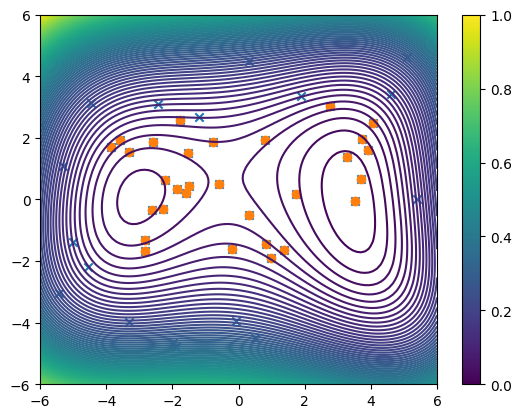

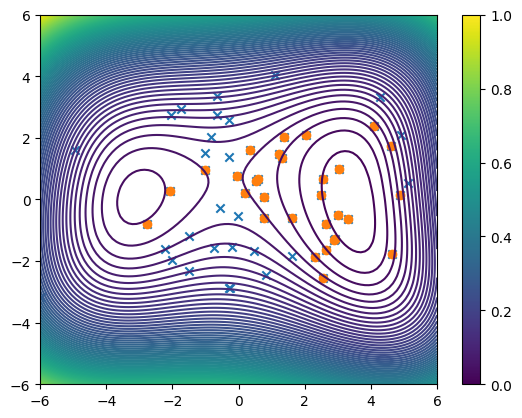

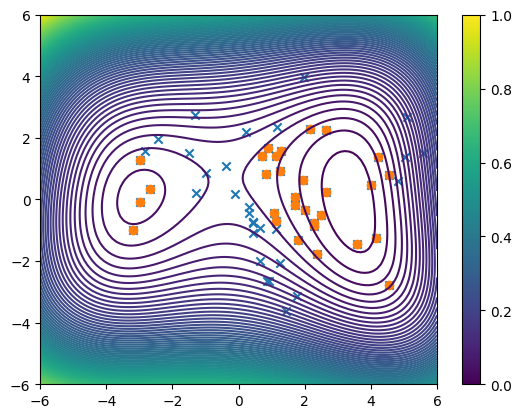

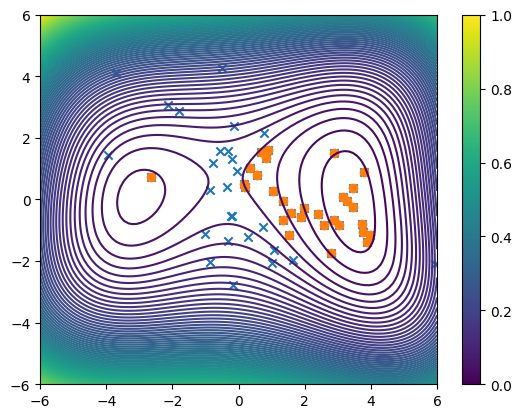

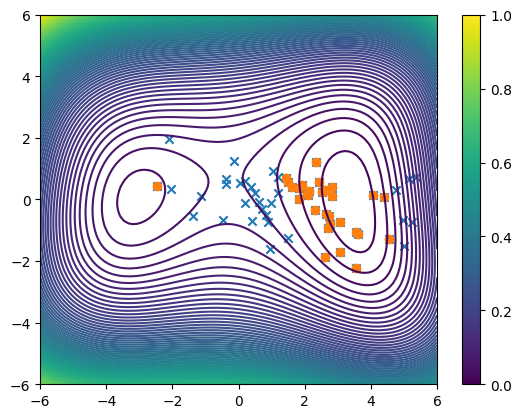

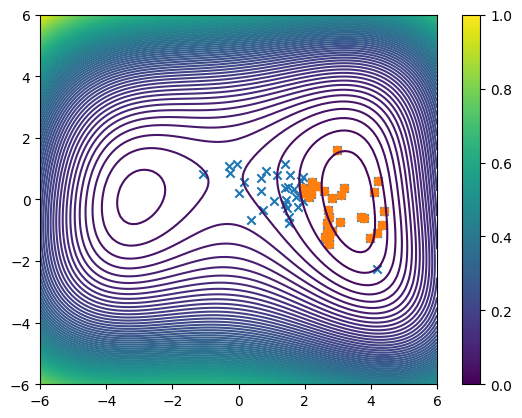

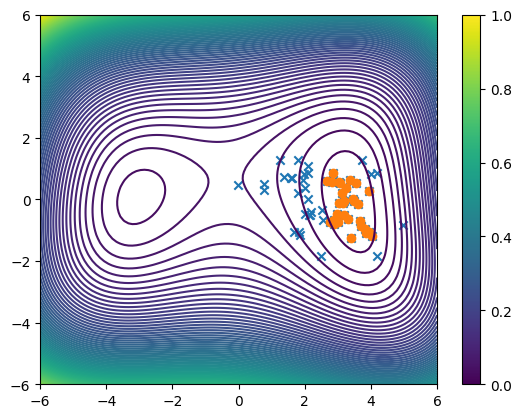

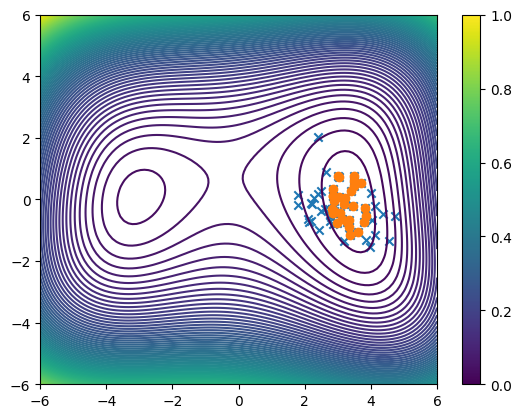

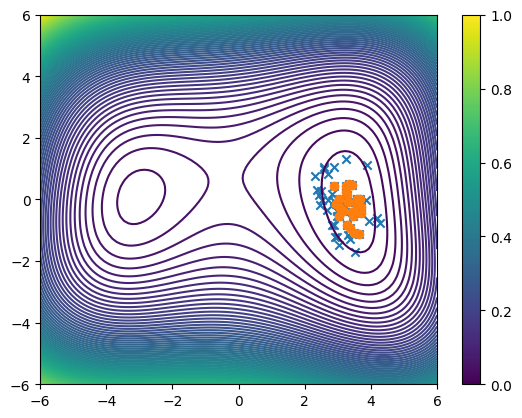

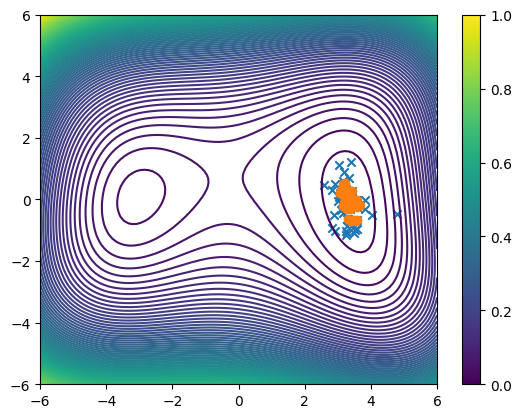

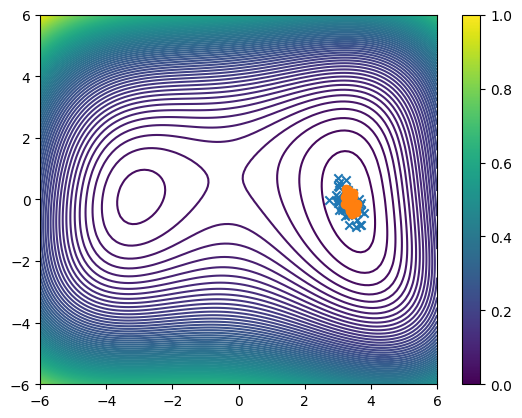

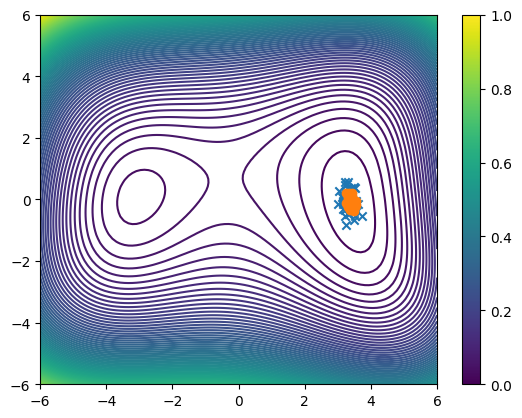

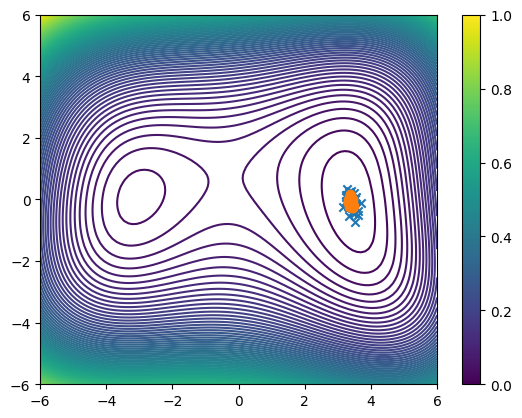

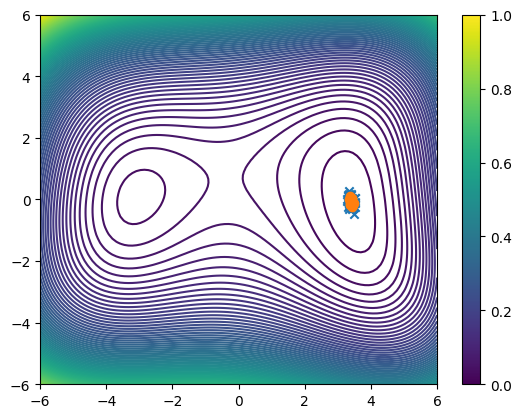

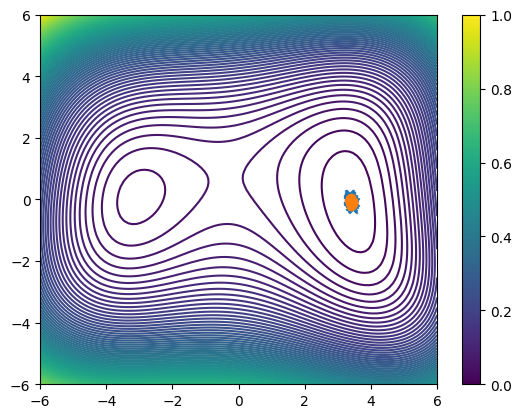

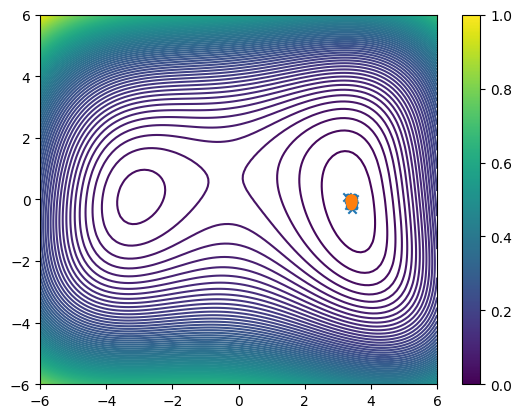

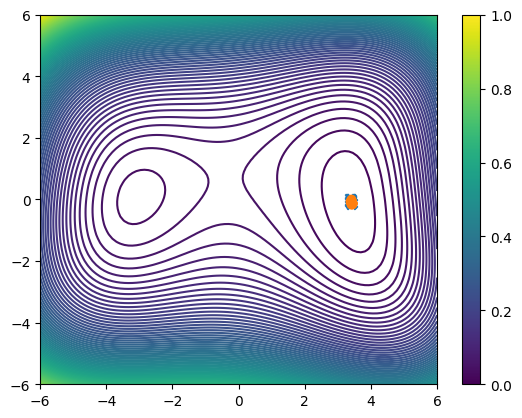

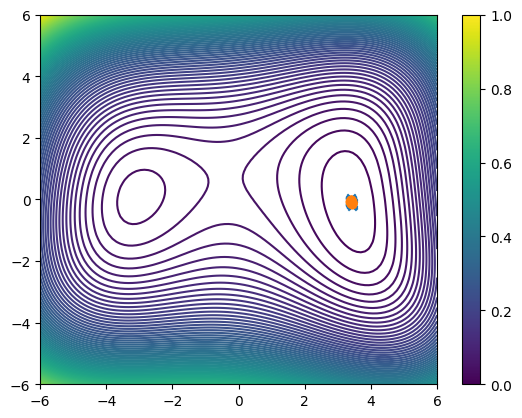

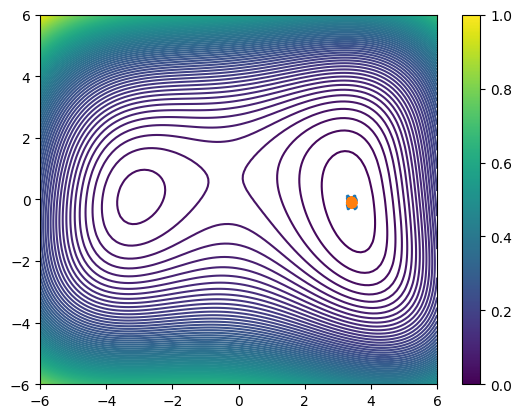

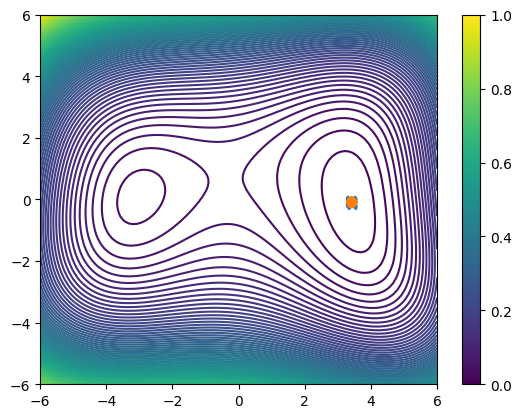

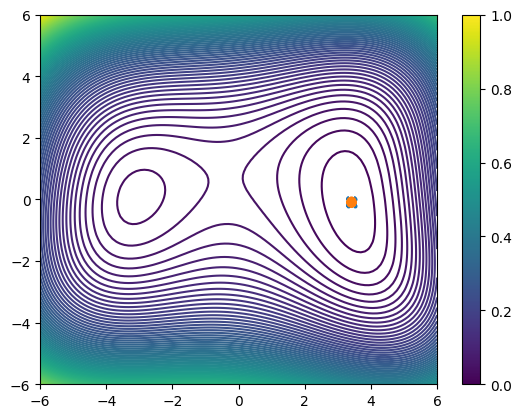

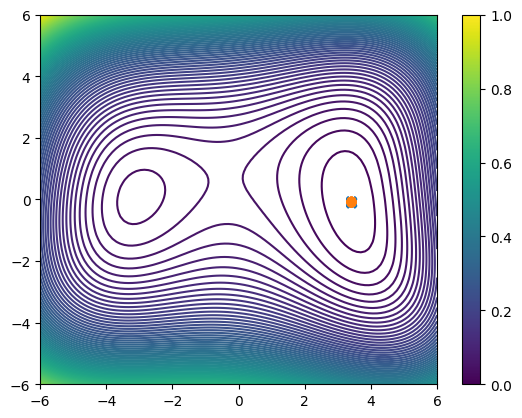

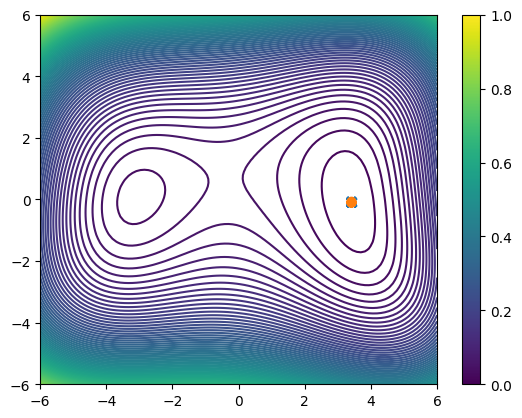

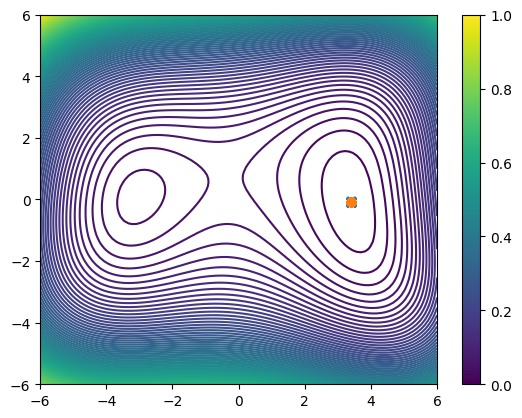

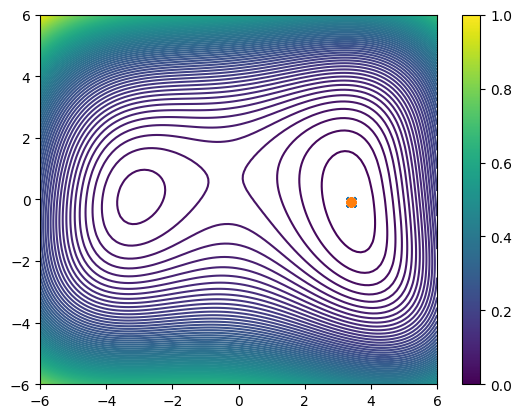

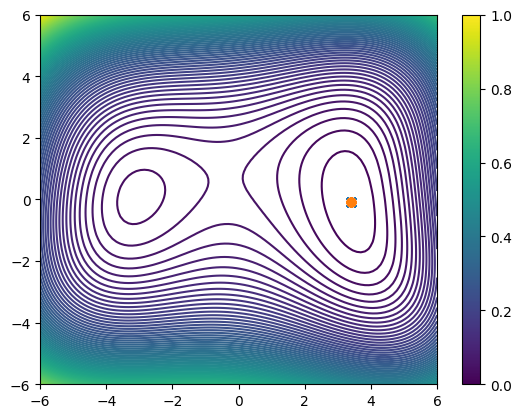

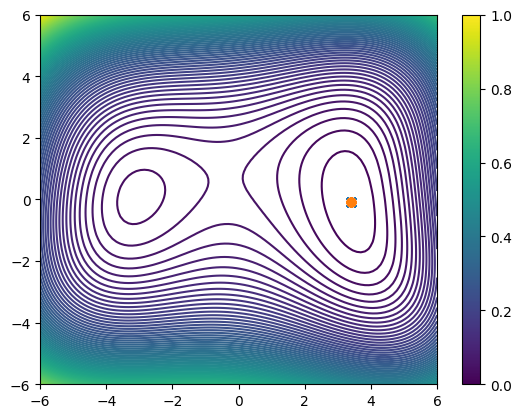

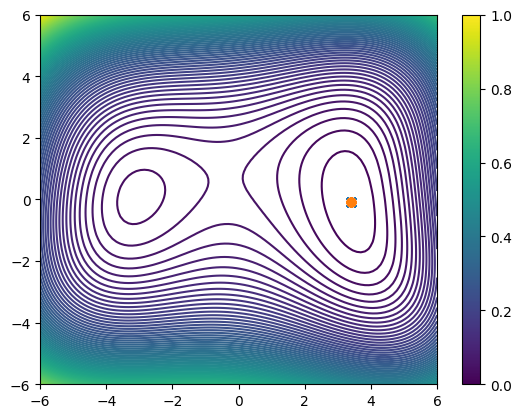

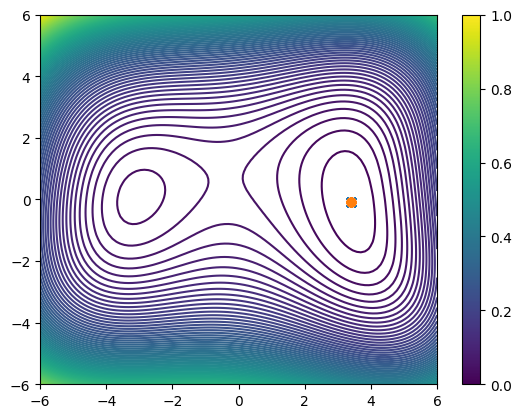

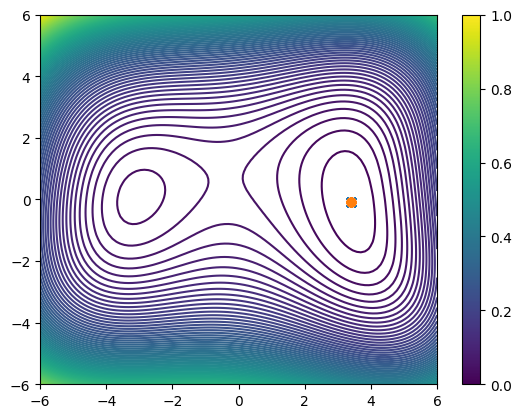

In [20]:
mean = np.array([0, 0])
covar = np.array([[(ubound-lbound), 0], [0, (ubound-lbound)]])

try:
    gen = 1
    while gen <= 30:
        population = generate(mean, covar)
        selected = select(population)
        newMean, newCovar = update_matrices(mean, covar, selected)
        plt.xlim(lbound, ubound)
        plt.ylim(lbound, ubound)
        plt.contour(ft_x, ft_y, ft_z, levels=100)
        plt.scatter([x[0] for x in population], [y[1] for y in population], marker='x')
        plt.scatter([x[0] for x in selected], [y[1] for y in selected], marker='o')
        plt.colorbar()
        plt.pause(0.5)
        mean, covar = newMean, newCovar
        gen += 1
    plt.show()
except KeyboardInterrupt:
    print("Exiting!")